In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("CRABS.csv")

In [3]:
df.head()

,PERIODO,ANCHO,LARGO,GROSOR,PESO
0,1,9.297727,6.804058,6.380079,37.104582
1,1,9.654786,3.619586,9.102777,34.021227
2,1,5.377703,9.044917,10.598056,25.981711
3,1,14.098674,7.382033,11.185293,29.343394
4,1,6.294001,8.956925,12.167698,27.287526


In [4]:
df.tail()

,PERIODO,ANCHO,LARGO,GROSOR,PESO
2444,6,25.723847,30.921759,11.252378,12.082250
2445,6,29.833819,30.808493,8.933800,16.340414
2446,6,33.901906,31.014893,16.359411,12.900400
2447,6,27.752412,24.225887,12.369999,14.752604
2448,6,15.769899,29.768449,4.602299,17.524055


In [5]:
df.shape

(2449, 5)

In [6]:
df.columns

Index(['PERIODO', 'ANCHO', 'LARGO', 'GROSOR', 'PESO'], dtype='object')

In [7]:
df.dtypes

PERIODO      int64
ANCHO      float64
LARGO      float64
GROSOR     float64
PESO       float64
dtype: object

four numerical variables and one categorical variable (int64)

# Unexpected values

In [8]:
df.describe()

,PERIODO,ANCHO,LARGO,GROSOR,PESO
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,3.741527,17.714824,19.368404,10.921714,16.436125
std,1.699599,7.326705,10.103494,3.102120,8.148782
min,1.000000,-1.249522,-3.746493,0.986723,-3.135037
25%,2.000000,11.845002,11.031884,8.728618,10.308223
50%,4.000000,17.396612,17.456395,10.932546,14.835435
75%,5.000000,23.714809,28.862348,13.039847,21.912939
max,6.000000,37.236428,42.341456,20.047713,45.012645


Tratar como dato nulo y llenar usando el promedio o la media dependiendo de la distribución de los datos

Poner cuantos el porcentaje de datos negativos

There are negative width, length and weight

Changing negative values

In [9]:
df["ANCHO"]=df["ANCHO"].abs()
df["LARGO"]=df["LARGO"].abs()
df["PESO"]=df["PESO"].abs()

In [10]:
df.describe()

,PERIODO,ANCHO,LARGO,GROSOR,PESO
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,3.741527,17.716279,19.377711,10.921714,16.443807
std,1.699599,7.323187,10.085625,3.102120,8.133264
min,1.000000,0.141757,0.027002,0.986723,0.115853
25%,2.000000,11.845002,11.031884,8.728618,10.308223
50%,4.000000,17.396612,17.456395,10.932546,14.835435
75%,5.000000,23.714809,28.862348,13.039847,21.912939
max,6.000000,37.236428,42.341456,20.047713,45.012645


In [17]:
df.nunique()

PERIODO       6
ANCHO      2449
LARGO      2449
GROSOR     2449
PESO       2449
dtype: int64

In [18]:
duplicateRowsDF = df[df.duplicated()]

In [19]:
duplicateRowsDF

,PERIODO,ANCHO,LARGO,GROSOR,PESO


There are not duplicated rows.

Si hay muchos duplicados afecta a los metodos de ML

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERIODO  2449 non-null   int64  
 1   ANCHO    2449 non-null   float64
 2   LARGO    2449 non-null   float64
 3   GROSOR   2449 non-null   float64
 4   PESO     2449 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 95.8 KB


In [21]:
df.isnull().sum()

PERIODO    0
ANCHO      0
LARGO      0
GROSOR     0
PESO       0
dtype: int64

0 null values

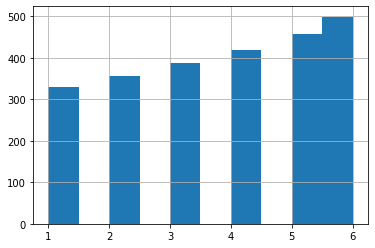

In [22]:
df.PERIODO.hist();

Right skew

The data is unbalanced towards period 6

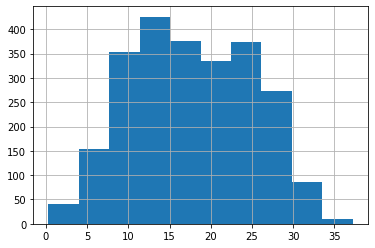

In [43]:
df.ANCHO.hist();

The variable width has a Bimodal distribution in 12 cm and 24 cm

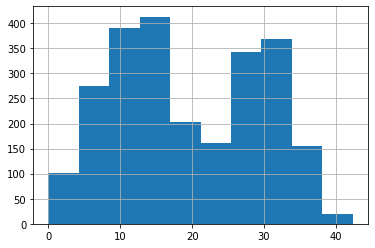

In [44]:
df.LARGO.hist();

The variable length has a Bimodal distribution in 11 and 31

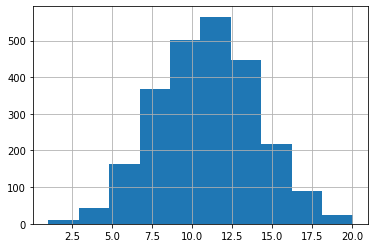

In [45]:
df.GROSOR.hist();

The thickness distribution is nearly normal

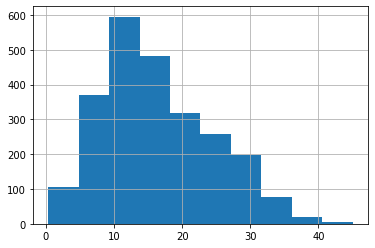

In [46]:
df.PESO.hist();

The weigth distribution is skew to the right

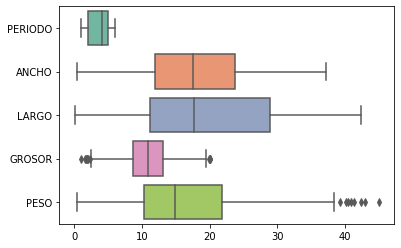

In [54]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

thickness and weight have several outliers. Width hase the lowest interquantile range among the numerical variables

In [47]:
import seaborn as sns

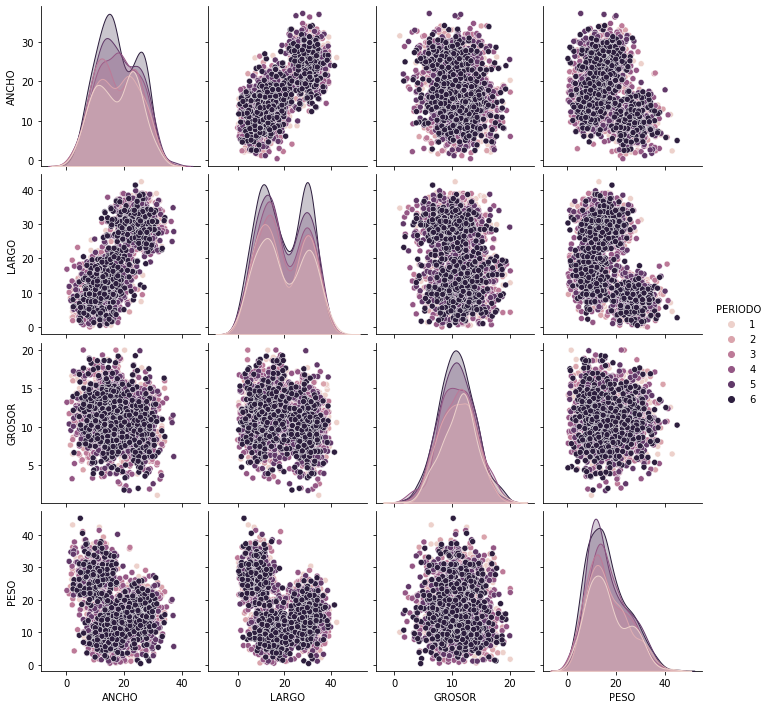

In [48]:
sns.pairplot(df, hue="PERIODO");

In [49]:
df.corr()

,PERIODO,ANCHO,LARGO,GROSOR,PESO
PERIODO,1.000000,0.016062,-0.002872,-0.043742,-0.007905
ANCHO,0.016062,1.000000,0.766793,-0.178946,-0.317680
LARGO,-0.002872,0.766793,1.000000,-0.207988,-0.335344
GROSOR,-0.043742,-0.178946,-0.207988,1.000000,-0.030240
PESO,-0.007905,-0.317680,-0.335344,-0.030240,1.000000


The width and length are highly correlated